In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms
import scipy as sp
import pingouin as pg
from sklearn.impute import KNNImputer

In [2]:
%matplotlib inline

sns.set_style('darkgrid')
sns.set_palette('Set2')

plt.rcParams['figure.figsize'] = (10, 6)

In [3]:
bosque_izquierdo = pd.read_csv('../../data/raw/bosque-izquierdo.csv')
bosque_izquierdo.head()

,precio,area_m2,habitaciones,baños,estrato,barrio,antiguead,administracion,parqueadero,piso,...,vista_panoramica,vista_exterior,picina,terraza,balcon,area_terraza_balcon_m2,descripcion,link,query,date
0,580000000,100.00,3,3,4,BOSQUE IZQUIERDO,Más de 20 años,750000.0,2.0,2,...,1,0,0,0,0,NaN,Hermoso apartamento ubicado en uno de los sect...,https://www.metrocuadrado.com/inmueble/venta-a...,bosque-izquierdo,Sun Apr 2 16:42:41 2023
1,420000000,51.00,1,2,4,Bosque Izquierdo,Entre 0 y 5 años,293000.0,1.0,6,...,0,0,0,1,1,NaN,Se vende hermoso apartamento en el barrio Bosq...,https://www.metrocuadrado.com/inmueble/venta-a...,bosque-izquierdo,Sun Apr 2 16:42:48 2023
2,390000000,59.00,1,2,4,La Macarena,Entre 0 y 5 años,NaN,1.0,NaN,...,0,0,0,1,0,1.0,"Moderno apartamento, con céntrica ubicación en...",https://www.metrocuadrado.com/inmueble/venta-a...,bosque-izquierdo,Sun Apr 2 16:42:57 2023
3,375000000,55.07,1,2,4,Bosque Izquierdo,Entre 5 y 10 años,307100.0,1.0,NaN,...,0,0,0,0,1,NaN,Hermoso apartamento para inversionistas con vi...,https://www.metrocuadrado.com/inmueble/venta-a...,bosque-izquierdo,Sun Apr 2 16:43:03 2023
4,365000000,59.18,1,2,4,Bosque Izquierdo,Entre 5 y 10 años,322500.0,1.0,NaN,...,0,0,0,0,1,NaN,Hermoso apartamento para inversionistas con vi...,https://www.metrocuadrado.com/inmueble/venta-a...,bosque-izquierdo,Sun Apr 2 16:43:11 2023


In [4]:
bosque_izquierdo['localidad'] = 'santa fe'

In [5]:
bosque_izquierdo.columns

Index(['precio', 'area_m2', 'habitaciones', 'baños', 'estrato', 'barrio',
       'antiguead', 'administracion', 'parqueadero', 'piso', 'codigo',
       'equipado', 'sauna', 'jacuzzi', 'calefaccion', 'porteria',
       'vista_panoramica', 'vista_exterior', 'picina', 'terraza', 'balcon',
       'area_terraza_balcon_m2', 'descripcion', 'link', 'query', 'date',
       'localidad'],
      dtype='object')

In [6]:
bosque_izquierdo.isnull().sum()

precio                     0
area_m2                    0
habitaciones               0
baños                      0
estrato                    0
barrio                     0
antiguead                  0
administracion             4
parqueadero                4
piso                      14
codigo                     0
equipado                   0
sauna                      0
jacuzzi                    0
calefaccion                0
porteria                   0
vista_panoramica           0
vista_exterior             0
picina                     0
terraza                    0
balcon                     0
area_terraza_balcon_m2    25
descripcion                0
link                       0
query                      0
date                       0
localidad                  0
dtype: int64

In [7]:
bosque_izquierdo.shape

(33, 27)

In [8]:
bosque_izquierdo.parqueadero.fillna(0, inplace=True)
bosque_izquierdo.parqueadero.value_counts()

1.0    24
2.0     5
0.0     4
Name: parqueadero, dtype: int64

In [9]:
bosque_izquierdo.piso[bosque_izquierdo.piso == 'o'] = np.nan
bosque_izquierdo.piso.value_counts()

C:\Users\erik1\AppData\Local\Temp\ipykernel_11348\2865134611.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bosque_izquierdo.piso[bosque_izquierdo.piso == 'o'] = np.nan


2    7
6    4
4    4
3    2
8    1
Name: piso, dtype: int64

In [10]:
bosque_izquierdo.loc[(bosque_izquierdo['balcon'] == 0) & (bosque_izquierdo['terraza'] == 0), 'area_terraza_balcon_m2'] = 0
bosque_izquierdo.area_terraza_balcon_m2.isnull().sum()

13

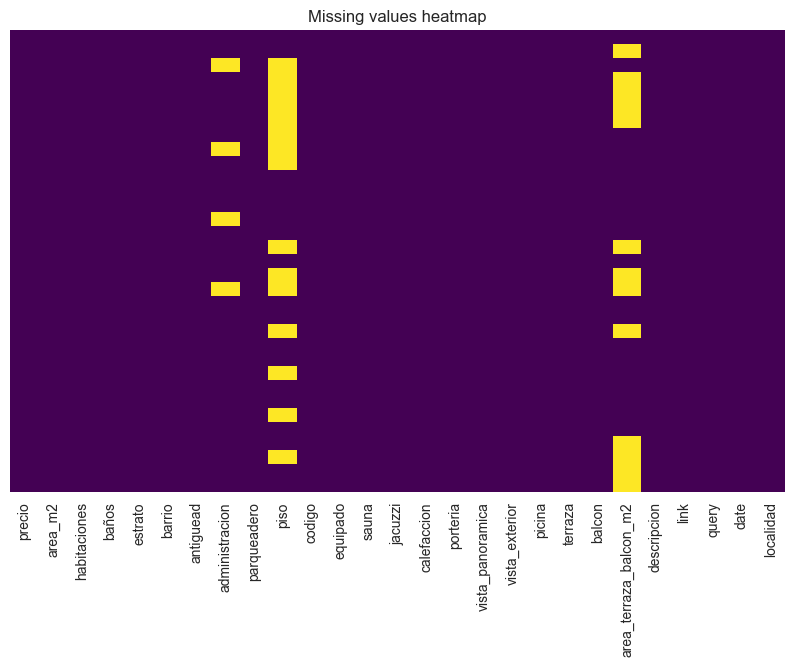

In [11]:
sns.heatmap(
    bosque_izquierdo.isnull(),
    cbar=False,
    yticklabels=False,
    cmap='viridis',
    # square=True
)

plt.title('Missing values heatmap')
plt.show()

In [12]:
del bosque_izquierdo['jacuzzi']

C:\Users\erik1\AppData\Local\Temp\ipykernel_11348\1894748432.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  bosque_izquierdo.corr(),
C:\Users\erik1\AppData\Local\Temp\ipykernel_11348\1894748432.py:8: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  mask=np.triu(np.ones_like(bosque_izquierdo.corr(), dtype=bool), k=1),


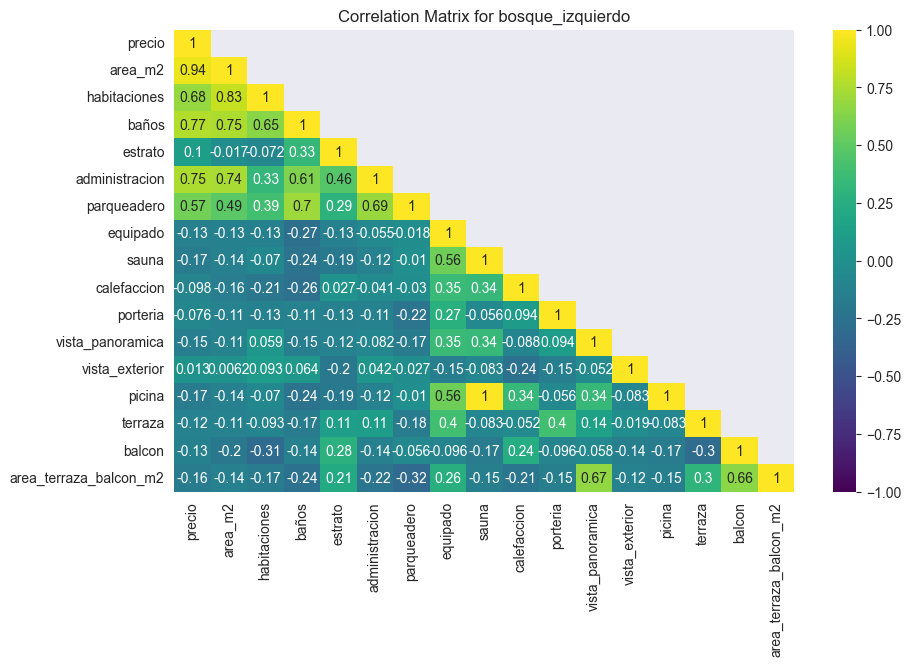

In [13]:
sns.heatmap(
    bosque_izquierdo.corr(),
    annot=True,
    cmap='viridis',
    vmin=-1,
    vmax=1,
    center=0,
    mask=np.triu(np.ones_like(bosque_izquierdo.corr(), dtype=bool), k=1),
)

plt.title('Correlation Matrix for bosque_izquierdo')
plt.show()

## Analisis Basico de los datos

### Administracion


In [14]:
admisntracion_na = bosque_izquierdo[bosque_izquierdo.administracion.isnull()]
admisntracion_na

,precio,area_m2,habitaciones,baños,estrato,barrio,antiguead,administracion,parqueadero,piso,...,vista_exterior,picina,terraza,balcon,area_terraza_balcon_m2,descripcion,link,query,date,localidad
2,390000000,59.0,1,2,4,La Macarena,Entre 0 y 5 años,NaN,1.0,NaN,...,0,0,1,0,1.0,"Moderno apartamento, con céntrica ubicación en...",https://www.metrocuadrado.com/inmueble/venta-a...,bosque-izquierdo,Sun Apr 2 16:42:57 2023,santa fe
8,1650000000,423.1,5,4,3,Bosque Izquierdo,Entre 10 y 20 años,NaN,2.0,NaN,...,0,0,0,0,0.0,"Bosque Izquierdo-Espectacular e iconica casa, ...",https://www.metrocuadrado.com/inmueble/venta-a...,bosque-izquierdo,Sun Apr 2 16:43:33 2023,santa fe
13,260000000,54.0,1,1,3,La Macarena,Más de 20 años,NaN,0.0,3,...,0,0,0,0,0.0,"Apartamento en excelente ubicación, cerca de l...",https://www.metrocuadrado.com/inmueble/venta-a...,bosque-izquierdo,Sun Apr 2 16:44:04 2023,santa fe
18,390000000,55.0,1,2,4,Bosque Izquierdo,Entre 0 y 5 años,NaN,1.0,NaN,...,0,0,0,1,NaN,Apartaestudio en venta en el complejo arquitec...,https://www.metrocuadrado.com/inmueble/venta-a...,bosque-izquierdo,Sun Apr 2 16:44:38 2023,santa fe


C:\Users\erik1\AppData\Local\Temp\ipykernel_11348\624044306.py:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(


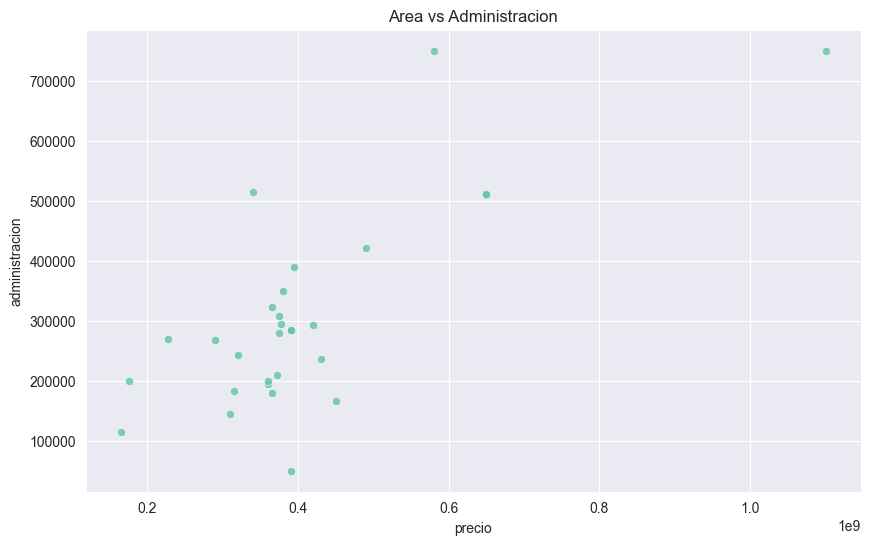

In [15]:
plt.figure(figsize=(10, 6))

sns.scatterplot(
    data=bosque_izquierdo,
    x='precio',
    y='administracion',
    # palette='Set2',
    palette='viridis',
    alpha=.8,
)

plt.title('Area vs Administracion')
plt.show()

C:\Users\erik1\AppData\Local\Temp\ipykernel_11348\3654611016.py:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(


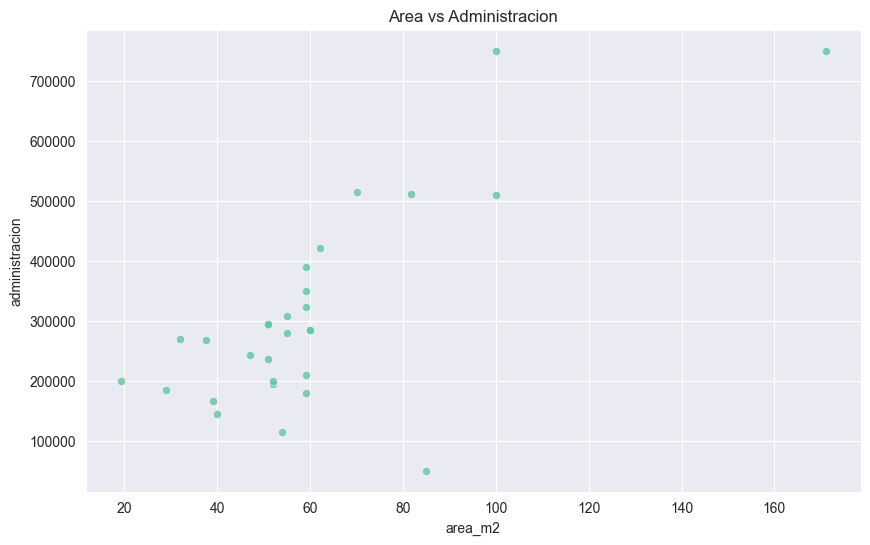

In [16]:
plt.figure(figsize=(10, 6))

sns.scatterplot(
    data=bosque_izquierdo,
    x='area_m2',
    y='administracion',
    # palette='Set2',
    palette='viridis',
    alpha=.8,
)

plt.title('Area vs Administracion')
plt.show()

In [17]:
smf.ols('administracion ~ area_m2', bosque_izquierdo).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         administracion   R-squared:                       0.540
Model:                            OLS   Adj. R-squared:                  0.523
Method:                 Least Squares   F-statistic:                     31.75
Date:                Sun, 02 Apr 2023   Prob (F-statistic):           5.57e-06
Time:                        20:56:02   Log-Likelihood:                -378.10
No. Observations:                  29   AIC:                             760.2
Df Residuals:                      27   BIC:                             762.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   4.409e+04   5.14e+04      0.857      0.399   -6.15e+04     1.5e+05
area_m2     4367.6864    775.163      5.635      0.000    2777.184    5958.189
==============================================================================
Omnibus:                        9.687   Durbin-Watson:                   1.755
Prob(Omnibus):                  0.008   Jarque-Bera (JB):               11.455
Skew:                          -0.720   Prob(JB):                      0.00325
Kurtosis:                       5.722   Cond. No.                         160.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [18]:
smf.ols(
    'administracion ~ area_m2 + precio + habitaciones + baños + estrato + C(antiguead)',
    bosque_izquierdo
).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         administracion   R-squared:                       0.706
Model:                            OLS   Adj. R-squared:                  0.588
Method:                 Least Squares   F-statistic:                     6.003
Date:                Sun, 02 Apr 2023   Prob (F-statistic):           0.000545
Time:                        20:56:03   Log-Likelihood:                -371.62
No. Observations:                  29   AIC:                             761.2
Df Residuals:                      20   BIC:                             773.6
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
======================================================================================================
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
Intercept                          -4.033e+05   1.77e+05     -2.277      0.034   -7.73e+05   -3.38e+04
C(antiguead)[T.Entre 10 y 20 años]  1.792e+05   1.16e+05      1.539      0.140   -6.37e+04    4.22e+05
C(antiguead)[T.Entre 5 y 10 años]    4.37e+04    4.5e+04      0.971      0.343   -5.02e+04    1.38e+05
C(antiguead)[T.Más de 20 años]     -1.463e+05   1.19e+05     -1.229      0.233   -3.95e+05    1.02e+05
area_m2                            -1563.8867   2966.614     -0.527      0.604   -7752.135    4624.362
precio                                 0.0009      0.000      2.529      0.020       0.000       0.002
habitaciones                        1.297e+05   6.09e+04      2.131      0.046    2712.346    2.57e+05
baños                               2.534e+04   6.39e+04      0.397      0.696   -1.08e+05    1.59e+05
estrato                             5.823e+04   4.78e+04      1.218      0.237   -4.15e+04    1.58e+05
==============================================================================
Omnibus:                        0.864   Durbin-Watson:                   1.791
Prob(Omnibus):                  0.649   Jarque-Bera (JB):                0.369
Skew:                           0.274   Prob(JB):                        0.832
Kurtosis:                       3.067   Cond. No.                     4.30e+09
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.3e+09. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Linear model evaluation

In [19]:
bosque_izquierdo.columns

Index(['precio', 'area_m2', 'habitaciones', 'baños', 'estrato', 'barrio',
       'antiguead', 'administracion', 'parqueadero', 'piso', 'codigo',
       'equipado', 'sauna', 'calefaccion', 'porteria', 'vista_panoramica',
       'vista_exterior', 'picina', 'terraza', 'balcon',
       'area_terraza_balcon_m2', 'descripcion', 'link', 'query', 'date',
       'localidad'],
      dtype='object')

In [20]:
model1 = smf.ols(
    formula='precio ~ area_m2 + habitaciones + baños + estrato + C(antiguead) + administracion + parqueadero + equipado + picina + balcon + terraza',
    data=bosque_izquierdo
).fit()

model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 precio   R-squared:                       0.937
Model:                            OLS   Adj. R-squared:                  0.883
Method:                 Least Squares   F-statistic:                     17.28
Date:                Sun, 02 Apr 2023   Prob (F-statistic):           1.06e-06
Time:                        20:56:04   Log-Likelihood:                -550.59
No. Observations:                  29   AIC:                             1129.
Df Residuals:                      15   BIC:                             1148.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
======================================================================================================
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
Intercept                           2.764e+08   1.06e+08      2.616      0.019    5.12e+07    5.02e+08
C(antiguead)[T.Entre 10 y 20 años] -1.251e+08   7.19e+07     -1.739      0.102   -2.78e+08    2.82e+07
C(antiguead)[T.Entre 5 y 10 años]  -4.373e+07   2.88e+07     -1.518      0.150   -1.05e+08    1.77e+07
C(antiguead)[T.Más de 20 años]      3.433e+07   7.57e+07      0.454      0.657   -1.27e+08    1.96e+08
area_m2                             5.297e+06   1.05e+06      5.046      0.000    3.06e+06    7.53e+06
habitaciones                       -1.044e+08   2.86e+07     -3.653      0.002   -1.65e+08   -4.35e+07
baños                              -4.997e+07   4.09e+07     -1.223      0.240   -1.37e+08    3.71e+07
estrato                            -1.382e+07   3.14e+07     -0.440      0.666   -8.07e+07    5.31e+07
administracion                       354.0464    154.804      2.287      0.037      24.090     684.003
parqueadero                        -2.354e+06   4.54e+07     -0.052      0.959   -9.92e+07    9.44e+07
equipado                             -1.2e+07    6.2e+07     -0.194      0.849   -1.44e+08     1.2e+08
picina                             -6.402e+07   9.64e+07     -0.664      0.517    -2.7e+08    1.42e+08
balcon                              9.158e+06   3.04e+07      0.301      0.767   -5.56e+07    7.39e+07
terraza                            -4.453e+07   5.37e+07     -0.829      0.420   -1.59e+08       7e+07
==============================================================================
Omnibus:                        0.805   Durbin-Watson:                   2.073
Prob(Omnibus):                  0.669   Jarque-Bera (JB):                0.671
Skew:                           0.349   Prob(JB):                        0.715
Kurtosis:                       2.737   Cond. No.                     3.87e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.87e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [21]:
model2 = smf.ols(
    formula='administracion ~ precio + area_m2 + habitaciones + baños + estrato + C(antiguead) + parqueadero + equipado + picina + balcon + terraza',
    data=bosque_izquierdo
).fit()

model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         administracion   R-squared:                       0.861
Model:                            OLS   Adj. R-squared:                  0.741
Method:                 Least Squares   F-statistic:                     7.149
Date:                Sun, 02 Apr 2023   Prob (F-statistic):           0.000281
Time:                        20:56:04   Log-Likelihood:                -360.76
No. Observations:                  29   AIC:                             749.5
Df Residuals:                      15   BIC:                             768.7
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
======================================================================================================
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
Intercept                          -3.367e+05   1.61e+05     -2.090      0.054    -6.8e+05    6728.547
C(antiguead)[T.Entre 10 y 20 años]  1.654e+05   1.05e+05      1.578      0.135   -5.81e+04    3.89e+05
C(antiguead)[T.Entre 5 y 10 años]   8.594e+04   3.85e+04      2.232      0.041    3859.731    1.68e+05
C(antiguead)[T.Más de 20 años]      8012.0163   1.09e+05      0.073      0.943   -2.25e+05    2.41e+05
precio                                 0.0007      0.000      2.287      0.037    4.97e-05       0.001
area_m2                            -1473.8623   2446.862     -0.602      0.556   -6689.224    3741.500
habitaciones                        8.018e+04   5.25e+04      1.527      0.147   -3.17e+04    1.92e+05
baños                               4405.7594   6.15e+04      0.072      0.944   -1.27e+05    1.36e+05
estrato                             3.342e+04   4.46e+04      0.750      0.465   -6.16e+04    1.28e+05
parqueadero                         1.383e+05   5.46e+04      2.532      0.023    2.19e+04    2.55e+05
equipado                             -5.8e+04   8.79e+04     -0.660      0.519   -2.45e+05    1.29e+05
picina                              1.722e+05   1.33e+05      1.292      0.216   -1.12e+05    4.56e+05
balcon                             -1440.9280   4.38e+04     -0.033      0.974   -9.47e+04    9.18e+04
terraza                              1.64e+05   6.66e+04      2.464      0.026    2.21e+04    3.06e+05
==============================================================================
Omnibus:                        0.941   Durbin-Watson:                   2.010
Prob(Omnibus):                  0.625   Jarque-Bera (JB):                0.284
Skew:                          -0.217   Prob(JB):                        0.868
Kurtosis:                       3.218   Cond. No.                     5.29e+09
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.29e+09. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Data imputation

In [22]:
bosque_izquierdo_imputed = bosque_izquierdo.copy()

In [23]:
x = bosque_izquierdo_imputed[bosque_izquierdo_imputed.select_dtypes(
    include=['number']).columns].drop('area_terraza_balcon_m2', axis=1)
y = bosque_izquierdo_imputed['area_terraza_balcon_m2']

In [24]:
imputer = KNNImputer(n_neighbors=5)
X_imputed = imputer.fit_transform(x)

In [25]:
df_imputed = pd.DataFrame(X_imputed, columns=x.columns)
df_imputed['area_terraza_balcon_m2'] = y

In [26]:
df_imputed.isna().sum()

precio                     0
area_m2                    0
habitaciones               0
baños                      0
estrato                    0
administracion             0
parqueadero                0
equipado                   0
sauna                      0
calefaccion                0
porteria                   0
vista_panoramica           0
vista_exterior             0
picina                     0
terraza                    0
balcon                     0
area_terraza_balcon_m2    13
dtype: int64

In [27]:
admisntracion_na

,precio,area_m2,habitaciones,baños,estrato,barrio,antiguead,administracion,parqueadero,piso,...,vista_exterior,picina,terraza,balcon,area_terraza_balcon_m2,descripcion,link,query,date,localidad
2,390000000,59.0,1,2,4,La Macarena,Entre 0 y 5 años,NaN,1.0,NaN,...,0,0,1,0,1.0,"Moderno apartamento, con céntrica ubicación en...",https://www.metrocuadrado.com/inmueble/venta-a...,bosque-izquierdo,Sun Apr 2 16:42:57 2023,santa fe
8,1650000000,423.1,5,4,3,Bosque Izquierdo,Entre 10 y 20 años,NaN,2.0,NaN,...,0,0,0,0,0.0,"Bosque Izquierdo-Espectacular e iconica casa, ...",https://www.metrocuadrado.com/inmueble/venta-a...,bosque-izquierdo,Sun Apr 2 16:43:33 2023,santa fe
13,260000000,54.0,1,1,3,La Macarena,Más de 20 años,NaN,0.0,3,...,0,0,0,0,0.0,"Apartamento en excelente ubicación, cerca de l...",https://www.metrocuadrado.com/inmueble/venta-a...,bosque-izquierdo,Sun Apr 2 16:44:04 2023,santa fe
18,390000000,55.0,1,2,4,Bosque Izquierdo,Entre 0 y 5 años,NaN,1.0,NaN,...,0,0,0,1,NaN,Apartaestudio en venta en el complejo arquitec...,https://www.metrocuadrado.com/inmueble/venta-a...,bosque-izquierdo,Sun Apr 2 16:44:38 2023,santa fe


In [28]:
df_imputed.loc[admisntracion_na.index, 'administracion']

2     272000.0
8     588480.0
13    221561.2
18    272000.0
Name: administracion, dtype: float64

In [29]:
df_imputed.columns

Index(['precio', 'area_m2', 'habitaciones', 'baños', 'estrato',
       'administracion', 'parqueadero', 'equipado', 'sauna', 'calefaccion',
       'porteria', 'vista_panoramica', 'vista_exterior', 'picina', 'terraza',
       'balcon', 'area_terraza_balcon_m2'],
      dtype='object')

In [33]:
# agregar las columnas que no estan en el df imputado
cols = bosque_izquierdo.columns.difference(df_imputed.columns)
cols.drop('query')
cols.drop('link')

Index(['antiguead', 'barrio', 'codigo', 'date', 'descripcion', 'link',
       'localidad', 'piso', 'query'],
      dtype='object')

<AxesSubplot: >

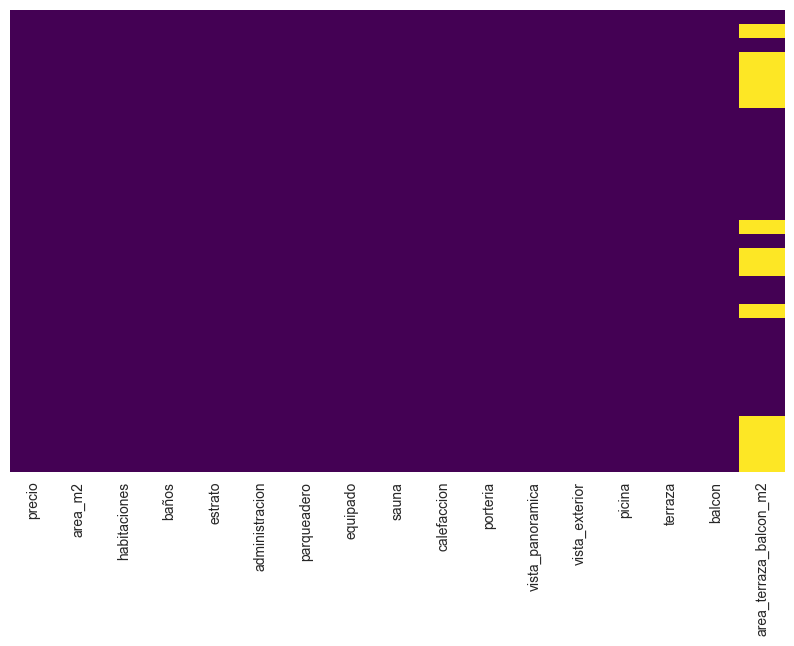

In [31]:
sns.heatmap(
    df_imputed.isnull(),
    cbar=False,
    yticklabels=False,
    cmap='viridis',
    # square=True
)

<AxesSubplot: >

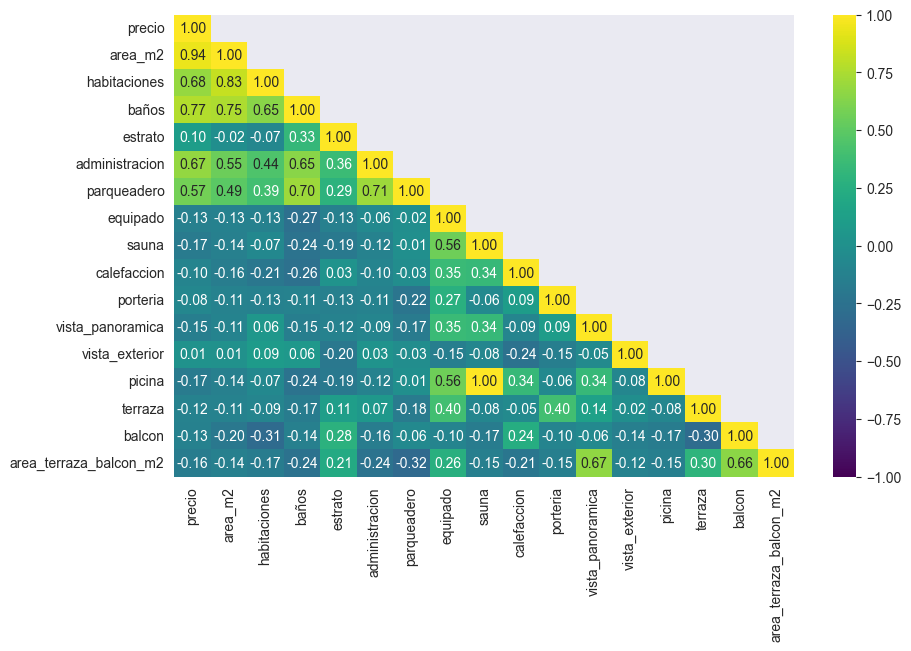

In [32]:
sns.heatmap(
    df_imputed.corr(), 
    annot=True,
    cmap='viridis',
    fmt='.2f',
    vmin=-1,
    vmax=1,
    center=0,
    # square=True,
    mask=np.triu(df_imputed.corr(), k=1)
)